In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filmtv-movies-dataset/filmtv_movies - ITA Excel.xlsx
/kaggle/input/filmtv-movies-dataset/filmtv_movies - ENG.csv
/kaggle/input/filmtv-movies-dataset/filmtv_movies - ITA.csv


In [2]:
df = pd.read_csv('/kaggle/input/filmtv-movies-dataset/filmtv_movies - ENG.csv')

In [3]:
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [4]:
genres = list(set(list(df['genre'].values)))
df['genre'][0] = 'Animation'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df['genre'] = df['genre'].replace(genres,list(range(28)))


In [6]:
df.drop(['description', 'notes'], axis = 1, inplace = True)

In [7]:
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,8,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,5,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,15,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,15,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,3,1,1,0,0


In [8]:
for i in range(len(df)):
    if ("," in str(df['country'][i])):
        df['country'][i] = df['country'][i].split(",")[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
unique_countries = list(set(df['country'].tolist()))

In [10]:
df['country'] = df['country'].replace(unique_countries,list(range(128)))


In [11]:
df.drop('actors', axis = 1, inplace = True)
df.head()

,filmtv_id,title,year,genre,duration,country,directors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,"David Detiege, Art Davis, Bill Perez",7.7,8.00,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,8,98,61,Luigi Perelli,6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,5,91,58,Don Chaffey,5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,15,95,58,Barry Levinson,7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,15,85,61,Esodo Pratelli,5.9,5.33,7.0,14,3,1,1,0,0


In [12]:
df.drop('directors', axis = 1, inplace = True)
df.head()

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0


In [13]:
df.head()

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0


In [14]:
X = df.drop(['title', 'filmtv_id'], axis = 1)
df.head()

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0


In [15]:
#Null value analysis
#Critics Vote has 4085 null entries avg score is 5.84
#Public Vote has 219 avg score is 5.96

print(df['public_vote'].mean())

5.963565560652939


In [16]:
X['critics_vote'].fillna(5.84, inplace = True)
X['public_vote'].fillna(5.96, inplace = True)
X.head()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0
1,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0
2,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0
3,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2
4,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0


In [17]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,26):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

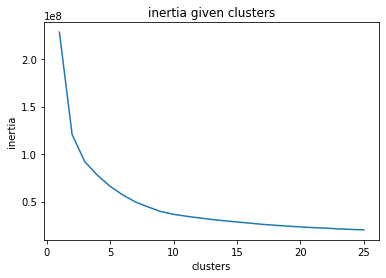

In [18]:
plt.plot(range(1,26),inertia)
plt.title('inertia given clusters')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()


In [19]:
kmeans = KMeans(n_clusters = 10, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [20]:
clustered_labels = list(kmeans.labels_)
print(clustered_labels)

[5, 9, 5, 5, 5, 3, 9, 5, 7, 5, 3, 9, 5, 7, 5, 9, 9, 7, 6, 5, 5, 9, 2, 9, 5, 5, 5, 5, 5, 5, 7, 5, 5, 4, 3, 7, 5, 5, 5, 9, 5, 3, 2, 4, 5, 4, 5, 9, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 4, 9, 5, 7, 5, 5, 5, 2, 9, 7, 4, 4, 5, 9, 7, 5, 9, 5, 5, 5, 5, 3, 9, 3, 2, 3, 3, 3, 3, 5, 9, 5, 5, 5, 5, 9, 5, 5, 9, 5, 5, 7, 5, 5, 7, 7, 9, 5, 3, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 5, 5, 5, 7, 5, 5, 5, 1, 5, 7, 5, 5, 5, 5, 5, 7, 5, 3, 3, 6, 9, 9, 7, 0, 5, 2, 5, 7, 5, 5, 5, 9, 7, 9, 5, 5, 9, 5, 5, 5, 7, 5, 4, 2, 5, 3, 5, 7, 9, 5, 4, 3, 5, 7, 9, 2, 3, 4, 5, 7, 5, 4, 5, 4, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 0, 7, 5, 4, 5, 7, 5, 2, 2, 5, 7, 3, 9, 5, 5, 5, 7, 5, 9, 5, 5, 5, 3, 4, 4, 5, 4, 7, 7, 5, 5, 5, 9, 9, 5, 5, 5, 5, 9, 5, 9, 9, 4, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 9, 9, 5, 5, 5, 5, 9, 5, 5, 5, 9, 5, 4, 5, 7, 3, 7, 3, 9, 5, 3, 9, 5, 9, 3, 5, 5, 7, 3, 9, 9, 3, 5, 9, 5, 4, 4, 7, 3, 5, 9, 9, 5, 5, 7, 5, 5, 5, 9, 5, 5, 9, 5, 5, 5, 5, 3, 5, 5, 5, 4, 7, 5, 7, 9, 7, 3, 5, 5, 9, 7, 3, 3, 9, 9, 4, 4, 7, 9, 5, 5, 

In [21]:
df['Clustered_Labels'] = clustered_labels
df.head()

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,Clustered_Labels
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0,5
1,3,18 anni tra una settimana,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0,9
2,17,Ride a Wild Pony,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0,5
3,18,Diner,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2,5
4,20,A che servono questi quattrini?,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0,5


In [22]:
most_popular = df.sort_values(by = 'total_votes', ascending = False)
most_popular.head(60)

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,Clustered_Labels
8238,12849,Pulp Fiction,1994,20,154,58,9.0,9.13,9.0,1010,3,3,4,3,1,6
4224,6476,The Shining,1980,10,119,58,9.1,9.31,9.0,964,1,2,3,4,1,6
21835,39496,Inglourious Basterds,2009,27,153,58,8.2,8.39,8.0,881,2,4,3,4,1,6
21794,39429,Gran Torino,2008,8,116,58,8.5,8.54,9.0,881,1,2,3,3,0,6
10790,17065,A Clockwork Orange,1971,19,137,82,9.1,9.38,9.0,870,1,3,3,3,1,6
15004,24309,Kill Bill: vol. 1,2003,11,100,58,7.8,7.70,8.0,816,2,4,2,4,1,6
1292,1963,2001: A Space Odyssey,1968,22,141,82,9.1,9.32,9.0,801,0,2,4,2,0,6
17094,27930,Million Dollar Baby,2004,8,137,58,8.4,8.38,8.0,799,1,3,3,4,0,6
6826,10623,Blade Runner,1982,22,124,58,9.0,9.03,9.0,789,1,2,3,4,2,6
26092,49812,Django Unchained,2012,23,163,58,7.8,7.68,8.0,760,3,3,3,4,2,6


In [23]:
pd.set_option('display.max_rows', None)
most_popular.head(150)

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,Clustered_Labels
8238,12849,Pulp Fiction,1994,20,154,58,9.0,9.13,9.0,1010,3,3,4,3,1,6
4224,6476,The Shining,1980,10,119,58,9.1,9.31,9.0,964,1,2,3,4,1,6
21835,39496,Inglourious Basterds,2009,27,153,58,8.2,8.39,8.0,881,2,4,3,4,1,6
21794,39429,Gran Torino,2008,8,116,58,8.5,8.54,9.0,881,1,2,3,3,0,6
10790,17065,A Clockwork Orange,1971,19,137,82,9.1,9.38,9.0,870,1,3,3,3,1,6
15004,24309,Kill Bill: vol. 1,2003,11,100,58,7.8,7.70,8.0,816,2,4,2,4,1,6
1292,1963,2001: A Space Odyssey,1968,22,141,82,9.1,9.32,9.0,801,0,2,4,2,0,6
17094,27930,Million Dollar Baby,2004,8,137,58,8.4,8.38,8.0,799,1,3,3,4,0,6
6826,10623,Blade Runner,1982,22,124,58,9.0,9.03,9.0,789,1,2,3,4,2,6
26092,49812,Django Unchained,2012,23,163,58,7.8,7.68,8.0,760,3,3,3,4,2,6


In [24]:
X['genre']*=10


In [25]:
X.head()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,1982,180,76,58,7.7,8.00,7.0,21,3,3,0,0,0
1,1991,80,98,61,6.5,6.00,7.0,4,0,2,0,2,0
2,1976,50,91,58,5.6,6.00,5.0,9,1,2,1,0,0
3,1982,150,95,58,7.0,8.00,6.0,18,2,2,0,1,2
4,1942,150,85,61,5.9,5.33,7.0,14,3,1,1,0,0


In [26]:
kmeans = KMeans(n_clusters = 10, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [27]:
second_try_labels = kmeans.labels_
second_try_df = df.copy()
second_try_df.drop('Clustered_Labels', axis = 1, inplace = True)
second_try_df['Labels'] = second_try_labels
second_try_df.head()

,filmtv_id,title,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,Labels
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,18,76,58,7.7,8.00,7.0,21,3,3,0,0,0,7
1,3,18 anni tra una settimana,1991,8,98,61,6.5,6.00,7.0,4,0,2,0,2,0,0
2,17,Ride a Wild Pony,1976,5,91,58,5.6,6.00,5.0,9,1,2,1,0,0,4
3,18,Diner,1982,15,95,58,7.0,8.00,6.0,18,2,2,0,1,2,7
4,20,A che servono questi quattrini?,1942,15,85,61,5.9,5.33,7.0,14,3,1,1,0,0,7


In [28]:
second_try_df.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'